## Solving a classification problem on Iris Flower Dataset using Decision Tree Classifier

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
iris_data = pd.read_csv('OneDrive/Desktop/Machine learning/IRIS_flower_dataset.csv')

In [3]:
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris_data.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [7]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

sepal_length       Axes(0.125,0.53;0.352273x0.35)
sepal_width     Axes(0.547727,0.53;0.352273x0.35)
petal_length       Axes(0.125,0.11;0.352273x0.35)
petal_width     Axes(0.547727,0.11;0.352273x0.35)
dtype: object

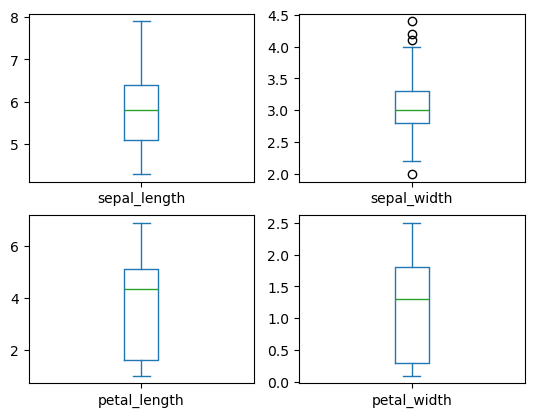

In [8]:
iris_data.plot(kind='box', layout=(2,2), subplots=True, sharex=False, sharey=False)

E:\CONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\CONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\CONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\CONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


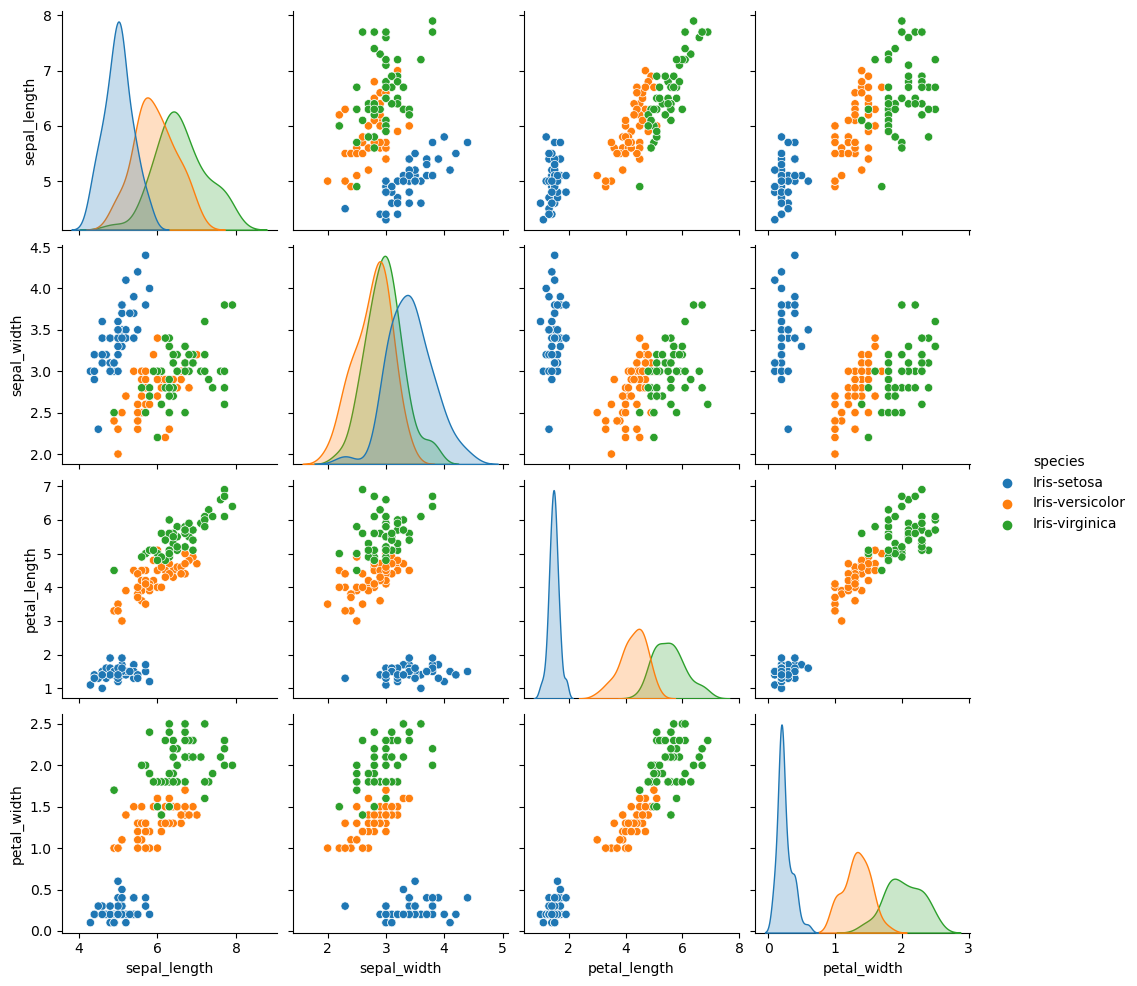

In [9]:
sns.pairplot(data=iris_data, hue='species')

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

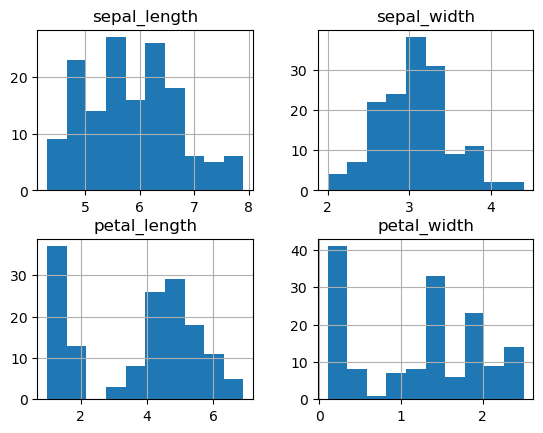

In [10]:
iris_data.hist()

In [11]:
y = iris_data['species']
iris_data.copy()
X = iris_data.drop('species', axis=1)

In [12]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [13]:
X.shape

(150, 4)

In [14]:
labelencoder = LabelEncoder()
labelencoder.fit_transform(y)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
# Split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [16]:
y_test

6          Iris-setosa
3          Iris-setosa
113     Iris-virginica
12         Iris-setosa
24         Iris-setosa
129     Iris-virginica
25         Iris-setosa
108     Iris-virginica
128     Iris-virginica
45         Iris-setosa
48         Iris-setosa
42         Iris-setosa
35         Iris-setosa
5          Iris-setosa
85     Iris-versicolor
54     Iris-versicolor
41         Iris-setosa
96     Iris-versicolor
144     Iris-virginica
89     Iris-versicolor
77     Iris-versicolor
74     Iris-versicolor
115     Iris-virginica
94     Iris-versicolor
87     Iris-versicolor
29         Iris-setosa
2          Iris-setosa
127     Iris-virginica
44         Iris-setosa
125     Iris-virginica
126     Iris-virginica
23         Iris-setosa
64     Iris-versicolor
117     Iris-virginica
84     Iris-versicolor
14         Iris-setosa
132     Iris-virginica
91     Iris-versicolor
53     Iris-versicolor
141     Iris-virginica
78     Iris-versicolor
97     Iris-versicolor
143     Iris-virginica
93     Iris

In [17]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
predictions = classifier.predict(X_test)

In [19]:
# Using classification_report as a metric to guage model performance
print("Classification Report: \n", classification_report(y_test, predictions))

Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [20]:
print("Accuracy Score: {}%".format(accuracy_score(y_test, predictions)*100))

Accuracy Score: 95.55555555555556%


In [21]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions))

Confusion Matrix: 
 [[17  0  0]
 [ 0 14  1]
 [ 0  1 12]]


In [23]:
# Creating a confusion matrix
pd.crosstab(y_test, predictions, rownames=['Actual names'], colnames=['Predicted names'])

Predicted names,Iris-setosa,Iris-versicolor,Iris-virginica
Actual names,,,
Iris-setosa,17,0,0
Iris-versicolor,0,14,1
Iris-virginica,0,1,12


# Ploting the Decison Tree

decision_tree must be an instance of DecisionTreeClassifier or DecisionTreeRegression

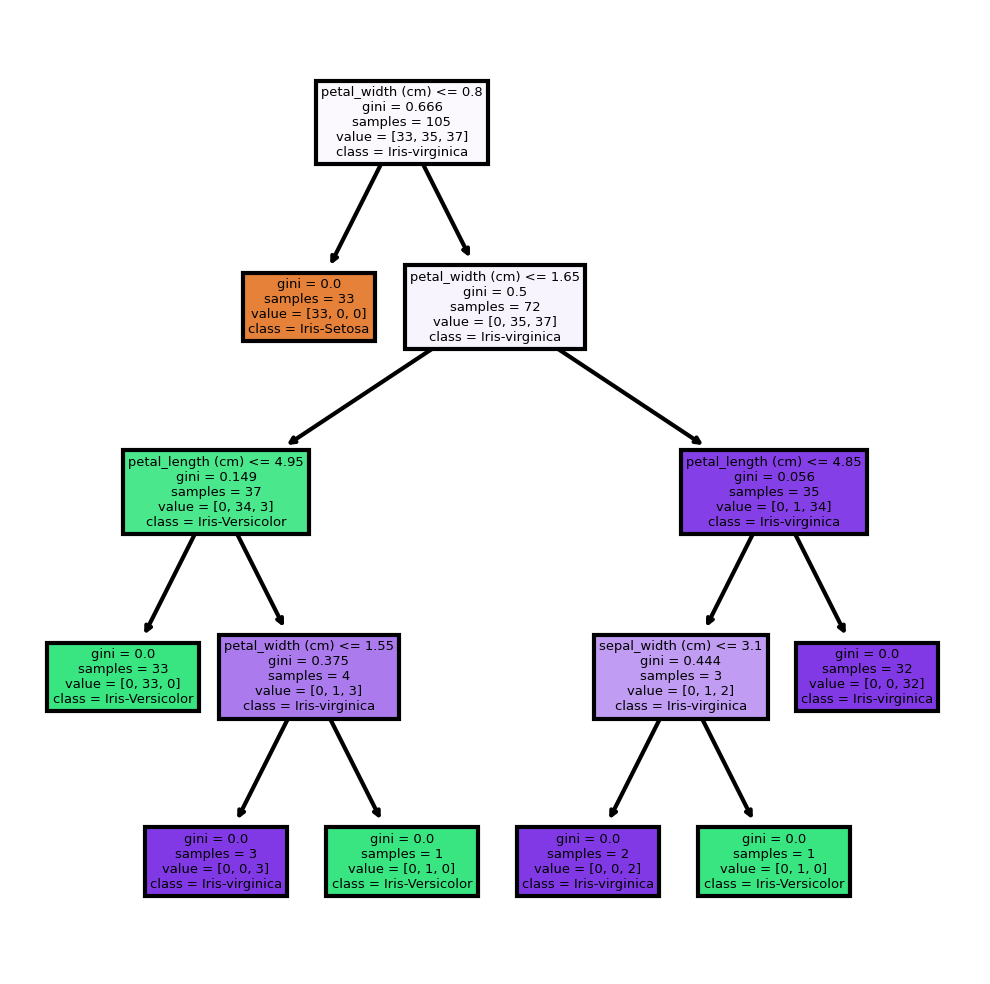

In [25]:
fn = ['sepal_length (cm)', 'sepal_width (cm)', 'petal_length (cm)', 'petal_width (cm)']
cn = ['Iris-Setosa', 'Iris-Versicolor', 'Iris-virginica']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
plot_tree(
    decision_tree=classifier,
    feature_names=fn,
    class_names=cn,
    filled = True,
)

fig.savefig('CART_Iris.png')